<a href="https://colab.research.google.com/github/ASV07/Data-studio/blob/main/Trivago_python_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install -q keras
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import datetime as dt

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#skipfooter to avoid last row which is a duplicate

In [22]:

campaigns = pd.read_csv('/content/drive/MyDrive/Trivago_Case/marketing_campaigns.csv', sep=';',skipfooter = 1, engine = 'python')



# Data Load check

In [ ]:
campaigns.head()

,Week,Campaign,Visits,Revenue,Cost,Rev_to_Cost_Ratio,Total_rev,revenue_per_visitor,gross_profit,ROI
0,1,Aldebaran,27,2.269511,3.763627,0.603012,-0.055338,0.084056,-1.494116,-0.396988
1,2,Aldebaran,64,10.820403,15.322613,0.706172,-0.070347,0.169069,-4.502210,-0.293828
2,3,Aldebaran,80,7.132998,10.753533,0.663317,-0.045257,0.089162,-3.620535,-0.336683
3,4,Aldebaran,93,11.085813,16.906191,0.655725,-0.062585,0.119202,-5.820379,-0.344275
4,5,Aldebaran,120,14.282481,21.446570,0.665956,-0.059701,0.119021,-7.164089,-0.334044


#General Overall Statistics

In [23]:

campaigns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Week      90 non-null     int64  
 1   Campaign  90 non-null     object 
 2   Visits    90 non-null     int64  
 3   Revenue   90 non-null     float64
 4   Cost      90 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 3.6+ KB


In [24]:
campaigns.Campaign.value_counts()

Aldebaran     30
Bartledan     30
Cottington    30
Name: Campaign, dtype: int64

#Calculated Columns

In [25]:


campaigns['Rev_to_Cost_Ratio'] = campaigns['Revenue']/campaigns['Cost']
campaigns['revenue per visitor'] = campaigns['Revenue']/campaigns['Visits']
campaigns['gross profit'] = campaigns['Revenue']-campaigns['Cost']
campaigns['total_rev'] = (campaigns['Revenue']-campaigns['Cost'])/campaigns['Visits']
campaigns['ROI'] = (campaigns['Revenue']-campaigns['Cost'])/campaigns['Cost']



#Recheck loading of all columns

In [42]:
campaigns.head()

,Week,Campaign,Visits,Revenue,Cost,Rev_to_Cost_Ratio,revenue per visitor,gross profit,total_rev,ROI
0,1,Aldebaran,27,2.269511,3.763627,0.603012,0.084056,-1.494116,-0.055338,-0.396988
1,2,Aldebaran,64,10.820403,15.322613,0.706172,0.169069,-4.502210,-0.070347,-0.293828
2,3,Aldebaran,80,7.132998,10.753533,0.663317,0.089162,-3.620535,-0.045257,-0.336683
3,4,Aldebaran,93,11.085813,16.906191,0.655725,0.119202,-5.820379,-0.062585,-0.344275
4,5,Aldebaran,120,14.282481,21.446570,0.665956,0.119021,-7.164089,-0.059701,-0.334044


#General overall stats

In [27]:

campaigns.describe()

,Week,Visits,Revenue,Cost,Rev_to_Cost_Ratio,revenue per visitor,gross profit,total_rev,ROI
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,15.500000,214.788889,235.401749,239.888475,0.952442,1.347490,-4.486726,-0.027843,-0.047558
std,8.703932,128.437498,134.127862,135.876952,0.132483,0.926006,25.811965,0.148445,0.132483
min,1.000000,27.000000,2.269511,3.763627,0.603012,0.084056,-59.181714,-0.278445,-0.396988
25%,8.000000,144.000000,120.761712,127.781050,0.882579,0.334412,-19.291879,-0.129563,-0.117421
50%,15.500000,158.500000,232.090920,234.700293,0.927880,1.291555,-7.505886,-0.058709,-0.072120
75%,23.000000,235.000000,356.154279,346.847241,1.053976,2.239453,17.341657,0.043560,0.053976
max,30.000000,613.000000,463.249265,507.521951,1.252820,2.913517,58.755344,0.394331,0.252820


# Cost to revenue sum comparison

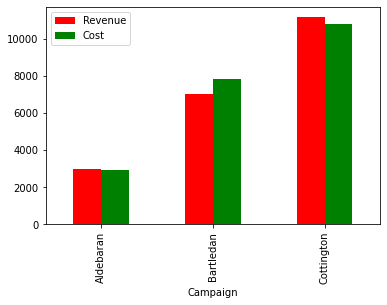

In [28]:


my_colors = 'rgbkymc' 
campaigns.groupby(['Campaign'])[['Revenue','Cost']].sum().plot(kind='bar', label = 'The revenue and cost of the campaigns',color=my_colors)
plt.legend()




This shows us that we are almost at break even for Aldebaran campaign wheas at profit for Cottington campaign and at loss for Bartledan campaign as a cumulative sum. Also we have spent the most on Cottington campaign too. 


# Cost to revenue mean comparison

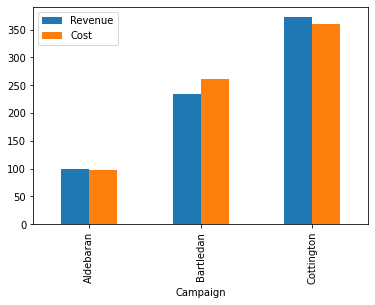

In [29]:

campaigns.groupby(['Campaign'])[['Revenue','Cost']].mean().plot(kind='bar', label = 'The revenue and cost of the campaigns')
plt.legend()

The situation repeats itself for mean instead of cumulative sum as well

#round to 2 decimal points for simpler comprehension

In [43]:
campaigns=campaigns.round(decimals=2, out=None)

In [44]:
campaigns.head()

,Week,Campaign,Visits,Revenue,Cost,Rev_to_Cost_Ratio,revenue per visitor,gross profit,total_rev,ROI
0,1,Aldebaran,27,2.27,3.76,0.60,0.08,-1.49,-0.06,-0.40
1,2,Aldebaran,64,10.82,15.32,0.71,0.17,-4.50,-0.07,-0.29
2,3,Aldebaran,80,7.13,10.75,0.66,0.09,-3.62,-0.05,-0.34
3,4,Aldebaran,93,11.09,16.91,0.66,0.12,-5.82,-0.06,-0.34
4,5,Aldebaran,120,14.28,21.45,0.67,0.12,-7.16,-0.06,-0.33


In [31]:
campaigns.describe()

,Week,Visits,Revenue,Cost,Rev_to_Cost_Ratio,revenue per visitor,gross profit,total_rev,ROI
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,15.500000,214.788889,235.401749,239.888475,0.952442,1.347490,-4.486726,-0.027843,-0.047558
std,8.703932,128.437498,134.127862,135.876952,0.132483,0.926006,25.811965,0.148445,0.132483
min,1.000000,27.000000,2.269511,3.763627,0.603012,0.084056,-59.181714,-0.278445,-0.396988
25%,8.000000,144.000000,120.761712,127.781050,0.882579,0.334412,-19.291879,-0.129563,-0.117421
50%,15.500000,158.500000,232.090920,234.700293,0.927880,1.291555,-7.505886,-0.058709,-0.072120
75%,23.000000,235.000000,356.154279,346.847241,1.053976,2.239453,17.341657,0.043560,0.053976
max,30.000000,613.000000,463.249265,507.521951,1.252820,2.913517,58.755344,0.394331,0.252820


#Comparison of campaigns & visits VS revenue per visitor & gross profit.

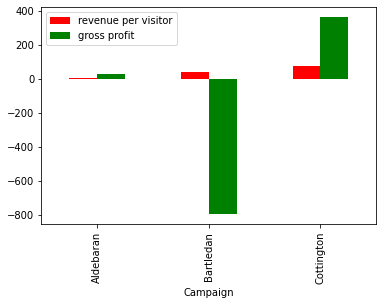

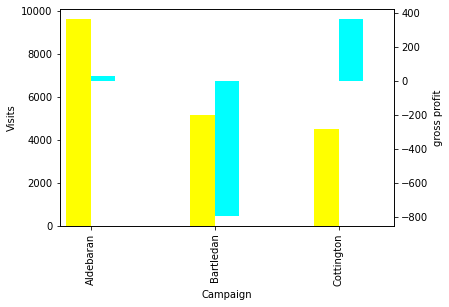

In [ ]:


campaigns.groupby(['Campaign'])[['revenue per visitor','gross profit']].sum().plot(kind='bar',color=my_colors)
plt.legend()

fig = plt.figure()

ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.2

campaigns.groupby(['Campaign'])['Visits'].sum().plot(kind='bar', color='yellow', label='Visits', ax=ax, width=width, position=1)
campaigns.groupby(['Campaign'])['gross profit'].sum().plot(kind='bar', color='cyan', label='Gross profit', ax=ax2, width=width, position=0)

ax.set_ylabel('Visits')
ax2.set_ylabel('gross profit')

plt.show()


The Alderbaran Campaign has the most number of Visits but least revenue per visitor, But Gross profit is still present without high investment. 
Although the Bartledan Campaign has second number of Visits its Gross Profit is negative, hence no point considering it. 
Finally the Cottington Campaign has the highest Gross profit despite lowest number of Visits. We need to analyze this further to understand what exactly is happening. 


#Spliting the dataframe into seperate ones for each campaign to measure Campaign Performance individually

In [32]:
Aldebaran = campaigns[campaigns.Campaign == 'Aldebaran']
Cottington = campaigns[campaigns.Campaign == 'Cottington']
Bartledan = campaigns[campaigns.Campaign == 'Bartledan']


#Performance of Aldebaran

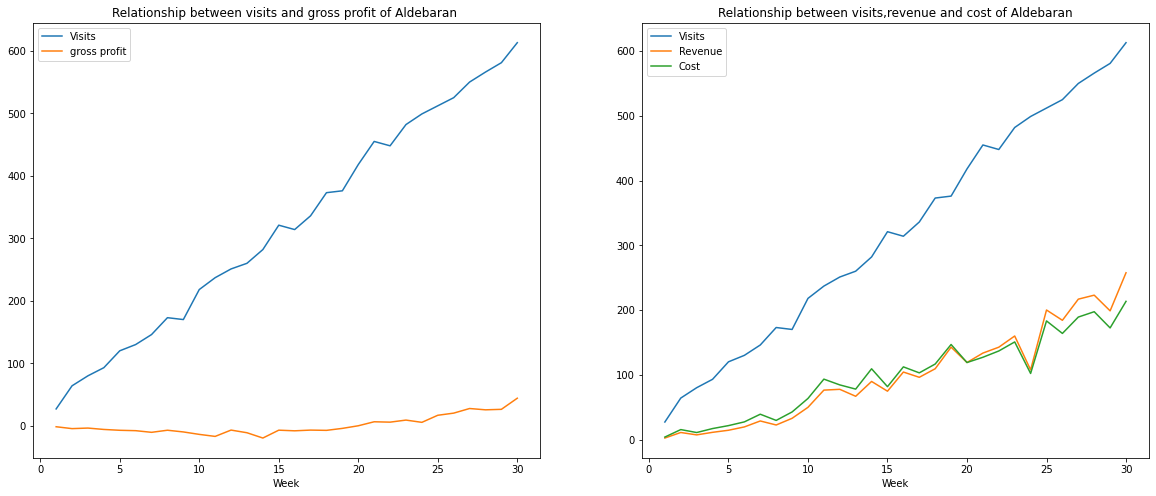

In [33]:
f,ax=plt.subplots(1,2,figsize=(20,8))
Aldebaran.groupby(['Week'])[['Visits','gross profit']].sum().plot(ax=ax[0])
ax[0].set_title('Relationship between visits and gross profit of Aldebaran ')
Aldebaran.groupby(['Week'])[['Visits','Revenue','Cost']].sum().plot(ax=ax[1])
ax[1].set_title('Relationship between visits,revenue and cost of Aldebaran')
plt.show()


Despite of a continously increasing positive trend of visits, it takes a while for the Alderbaran Campaign to pick off. Till Week 14 Gross Profit shows a negative trend after which it shows a very positive trend tending closer to a positive cumulative profit.(although right now the cumulative profit is negative but looks like it will soon be turned positive in the coming weeks) 
Also Revenue has continously started to cover the Cost from Week 20 onwards.


#Correlation between each factor: Visits vs Revenue, Revenue vs Cost, Visits vs Gross profit 

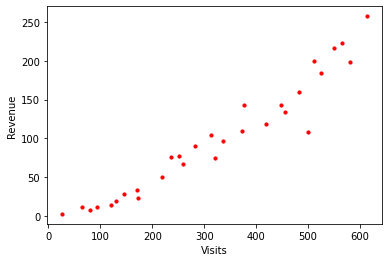

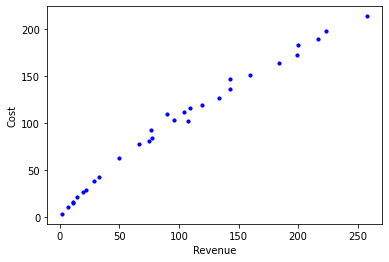

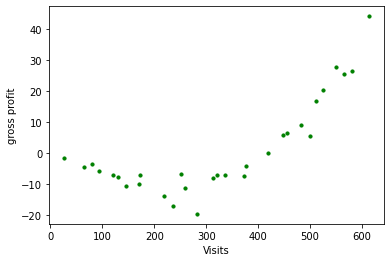

In [45]:
Aldebaran.plot.scatter('Visits', 'Revenue', s=10, c='red')
Aldebaran.plot.scatter('Revenue', 'Cost', s=10, c='blue')
Aldebaran.plot.scatter('Visits', 'gross profit', s=10, c='green')

Visits and revenue have a positive and strong correlation.
From the positive correlation between cost and revenue we observe early heavy investment followed by gradual decrease in investment, but still a steady rise in revenue.
Gross Profit shows an early negative correlation to Visits but clearly shows a positive correlation post crossing the 300 Visits mark i.e. around week 14-15 mark.This is a clear sign to future upward trajectory for Aldebaran campaign.

 


# Revenue per visitor VS ROI

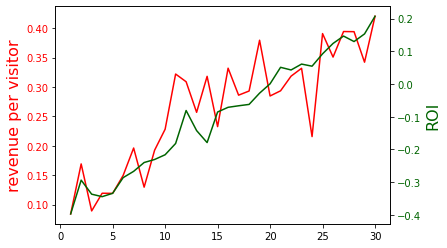

In [35]:
fig, ax1 = plt.subplots()
x = Aldebaran.groupby(['Week'])['revenue per visitor'].sum()
y = Aldebaran.groupby(['Week'])['ROI'].sum()
ax1.plot(x,color="red")
ax1.set_ylabel(r"revenue per visitor", fontsize=16, color="red")
for label in ax1.get_yticklabels():
    label.set_color("red")
    
ax2 = ax1.twinx()
ax2.plot(y, color="darkgreen")
ax2.set_ylabel(r"ROI", fontsize=16, color="darkgreen")
for label in ax2.get_yticklabels():
    label.set_color("darkgreen")

Revenue per visitor has a general positive trend but with significant drops at week 3,24,8,15,20. Deeper diving into these weeks can give us a good idea of the reason behind this drop which could be say realted to efficiency of the marketing campaign or some special occasions(malfunctioning of website functionalities) leading to loss of visitor engagement. This analysis can help us optimize our campaigns.
ROI fluctuates a lot in comparison to Revenue per visitor and it is difficult to say whether they have a strong relationship.



#Performance of Bartledan

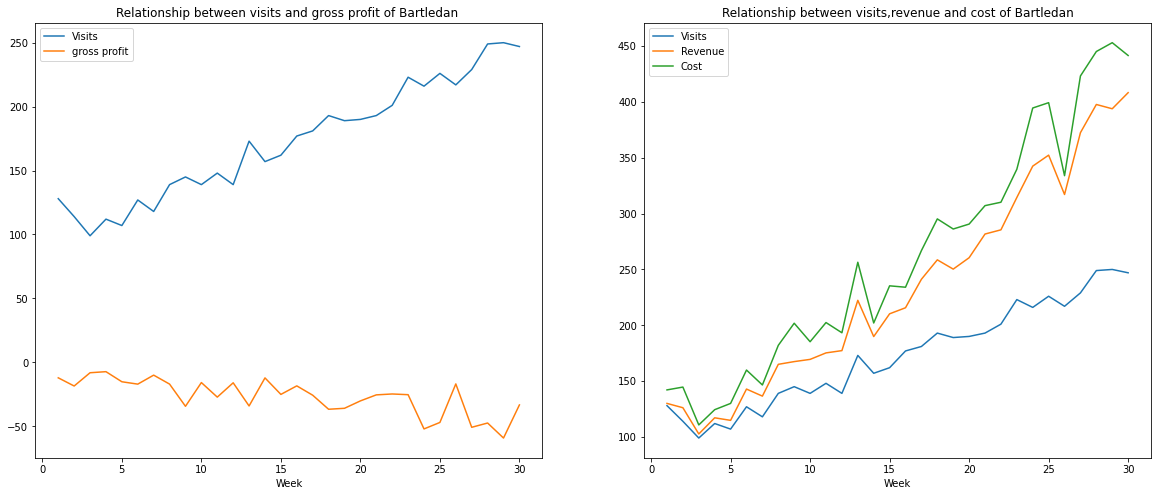

In [36]:
f,ax=plt.subplots(1,2,figsize=(20,8))
Bartledan.groupby(['Week'])[['Visits','gross profit']].sum().plot(ax=ax[0])
ax[0].set_title('Relationship between visits and gross profit of Bartledan ')
Bartledan.groupby(['Week'])[['Visits','Revenue','Cost']].sum().plot(ax=ax[1])
ax[1].set_title('Relationship between visits,revenue and cost of Bartledan')
plt.show()

Despite of a continously increasing positive trend of visits, Gross Profit shows a negative trend throughout(the cumulative profit is negative) 
Also Revenue has never been aable to cover the Cost from Week 1 onwards itself.



#Correlation between each factor: Visits vs Revenue, Revenue vs Cost, Visits vs Gross profit 

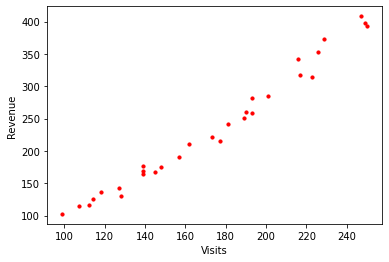

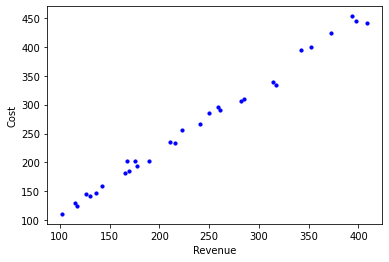

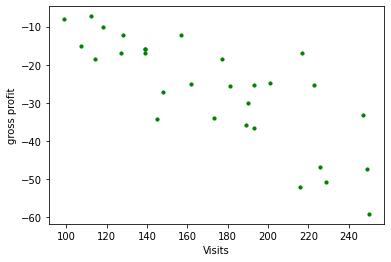

In [37]:
Bartledan.plot.scatter('Visits', 'Revenue', s=10, c='red')
Bartledan.plot.scatter('Revenue', 'Cost', s=10, c='blue')
Bartledan.plot.scatter('Visits', 'gross profit', s=10, c='green')

Visits and revenue have a positive correlation.
From the positive correlation between cost and revenue we observe heavy investment throughout, but still a revenue never covers the cost.
Gross Profit shows a clear negative correlation to Visits i.e. as Visits increase Gross profit reduces, a clear no to future usage of Bartledan campaign



# Revenue per visitor VS ROI

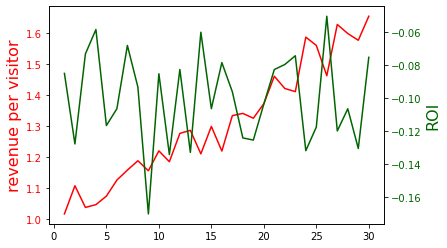

In [38]:
fig, ax1 = plt.subplots()
x = Bartledan.groupby(['Week'])['revenue per visitor'].sum()
y = Bartledan.groupby(['Week'])['ROI'].sum()
ax1.plot(x,color="red")
ax1.set_ylabel(r"revenue per visitor", fontsize=16, color="red")
for label in ax1.get_yticklabels():
    label.set_color("red")
    
ax2 = ax1.twinx()
ax2.plot(y, color="darkgreen")
ax2.set_ylabel(r"ROI", fontsize=16, color="darkgreen")
for label in ax2.get_yticklabels():
    label.set_color("darkgreen")

Revenue per visitor has a general positive trend but with significant drops at week 3,26,16,14,11. Deeper diving into these weeks can give us a good idea of the reason behind this drop which could be say realted to efficiency of the marketing campaign or some special occasions (malfunctioning of website functionalities) leading to loss of visitor engagement. This analysis can help us optimize our campaigns.
ROI fluctuates a lot in comparison to Revenue per visitor and it is difficult to say whether they have a strong relationship.



#Performance of Cottington

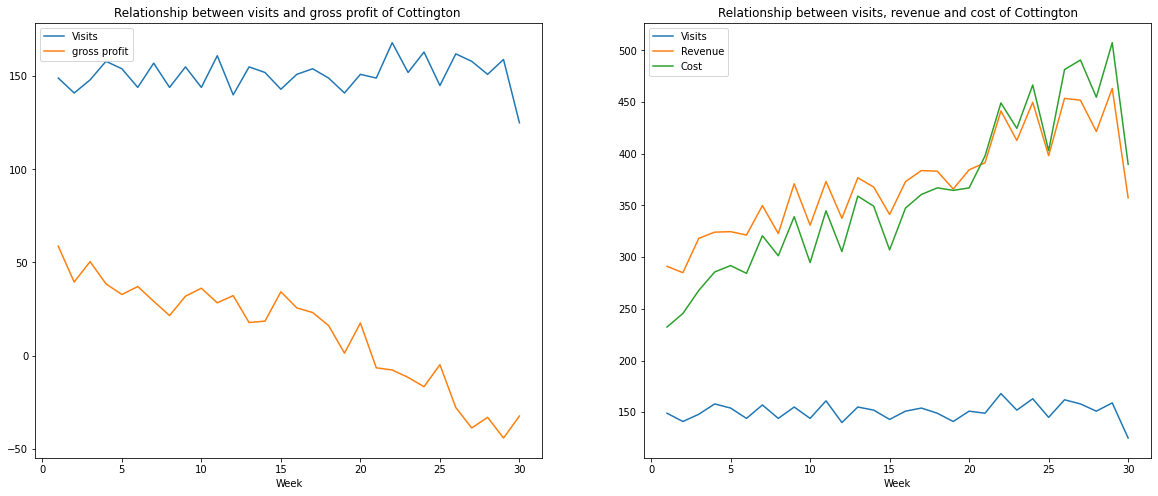

In [39]:
f,ax=plt.subplots(1,2,figsize=(20,8))
Cottington.groupby(['Week'])[['Visits','gross profit']].sum().plot(ax=ax[0])
ax[0].set_title('Relationship between visits and gross profit of Cottington ')
Cottington.groupby(['Week'])[['Visits','Revenue','Cost']].sum().plot(ax=ax[1])
ax[1].set_title('Relationship between visits, revenue and cost of Cottington')
plt.show()

Despite of a continously increasing positive trend of visits,Gross Profit shows a negative trend throughout(the cumulative profit is positive). Till Week 20 Gross Profit despite a negative trend has overall positive gross profit values (after which gross profit drops below zero for all coming weeks). 
Also Revenue has continously covered the Cost till Week 20 after which Cost takes over i.e. cost > revenue from week 21.



#Correlation between each factor: Visits vs Revenue, Revenue vs Cost, Visits vs Gross profit 

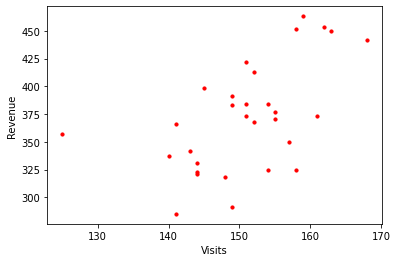

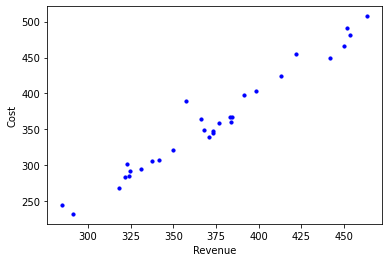

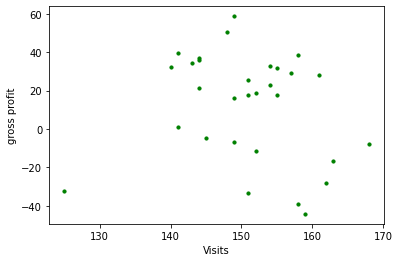

In [40]:
Cottington.plot.scatter('Visits', 'Revenue', s=10, c='red')
Cottington.plot.scatter('Revenue', 'Cost', s=10, c='blue')
Cottington.plot.scatter('Visits', 'gross profit', s=10, c='green')

Visits and revenue have a not so significant negative correlation.
From the positive correlation between cost and revenue we observe heavy investment throughout, but still revenue only never covers the cost till week 20 after which cost takes over.
Gross Profit shows a not very strong negative correlation to Visits i.e. as Visits increase Gross profit reduces, a clear no to future usage of Cottington campaign.



# Revenue per visitor VS ROI

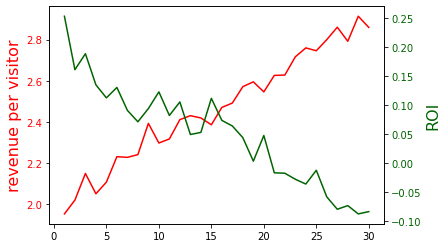

In [41]:
fig, ax1 = plt.subplots()
x = Cottington.groupby(['Week'])['revenue per visitor'].sum()
y = Cottington.groupby(['Week'])['ROI'].sum()
ax1.plot(x,color="red")
ax1.set_ylabel(r"revenue per visitor", fontsize=16, color="red")
for label in ax1.get_yticklabels():
    label.set_color("red")
    
ax2 = ax1.twinx()
ax2.plot(y, color="darkgreen")
ax2.set_ylabel(r"ROI", fontsize=16, color="darkgreen")
for label in ax2.get_yticklabels():
    label.set_color("darkgreen")


Revenue per visitor shows an increasing trend but spikes heavily from around weeks 9,3,6,12 and 29 .(We can analyze this further to see the reasons for such an activity happening)
Also we know from earlier analysis, visits are not increasing along the time, but cost surely increases with respect to revenue increase.
Finally we can also see that the Drop in ROI is a clear indicator of the same.